# Isomap
## 1. Exercise 1
- Write you own implementation of isomap.
- apply it to the swiss roll dataset from lab 1
- use a modified version of the swiss roll dataset, in which Gaussian noise from a normal $\mathcal{n}(\mu=0,\sigma=0.5)$ is added to the $x$  and $y$ coordinates.  
Apply isomap to this dataset and discuss the differences with the preivous point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from unsupervised_learning import Isomap, swiss_roll
from sklearn.linear_model import LogisticRegression

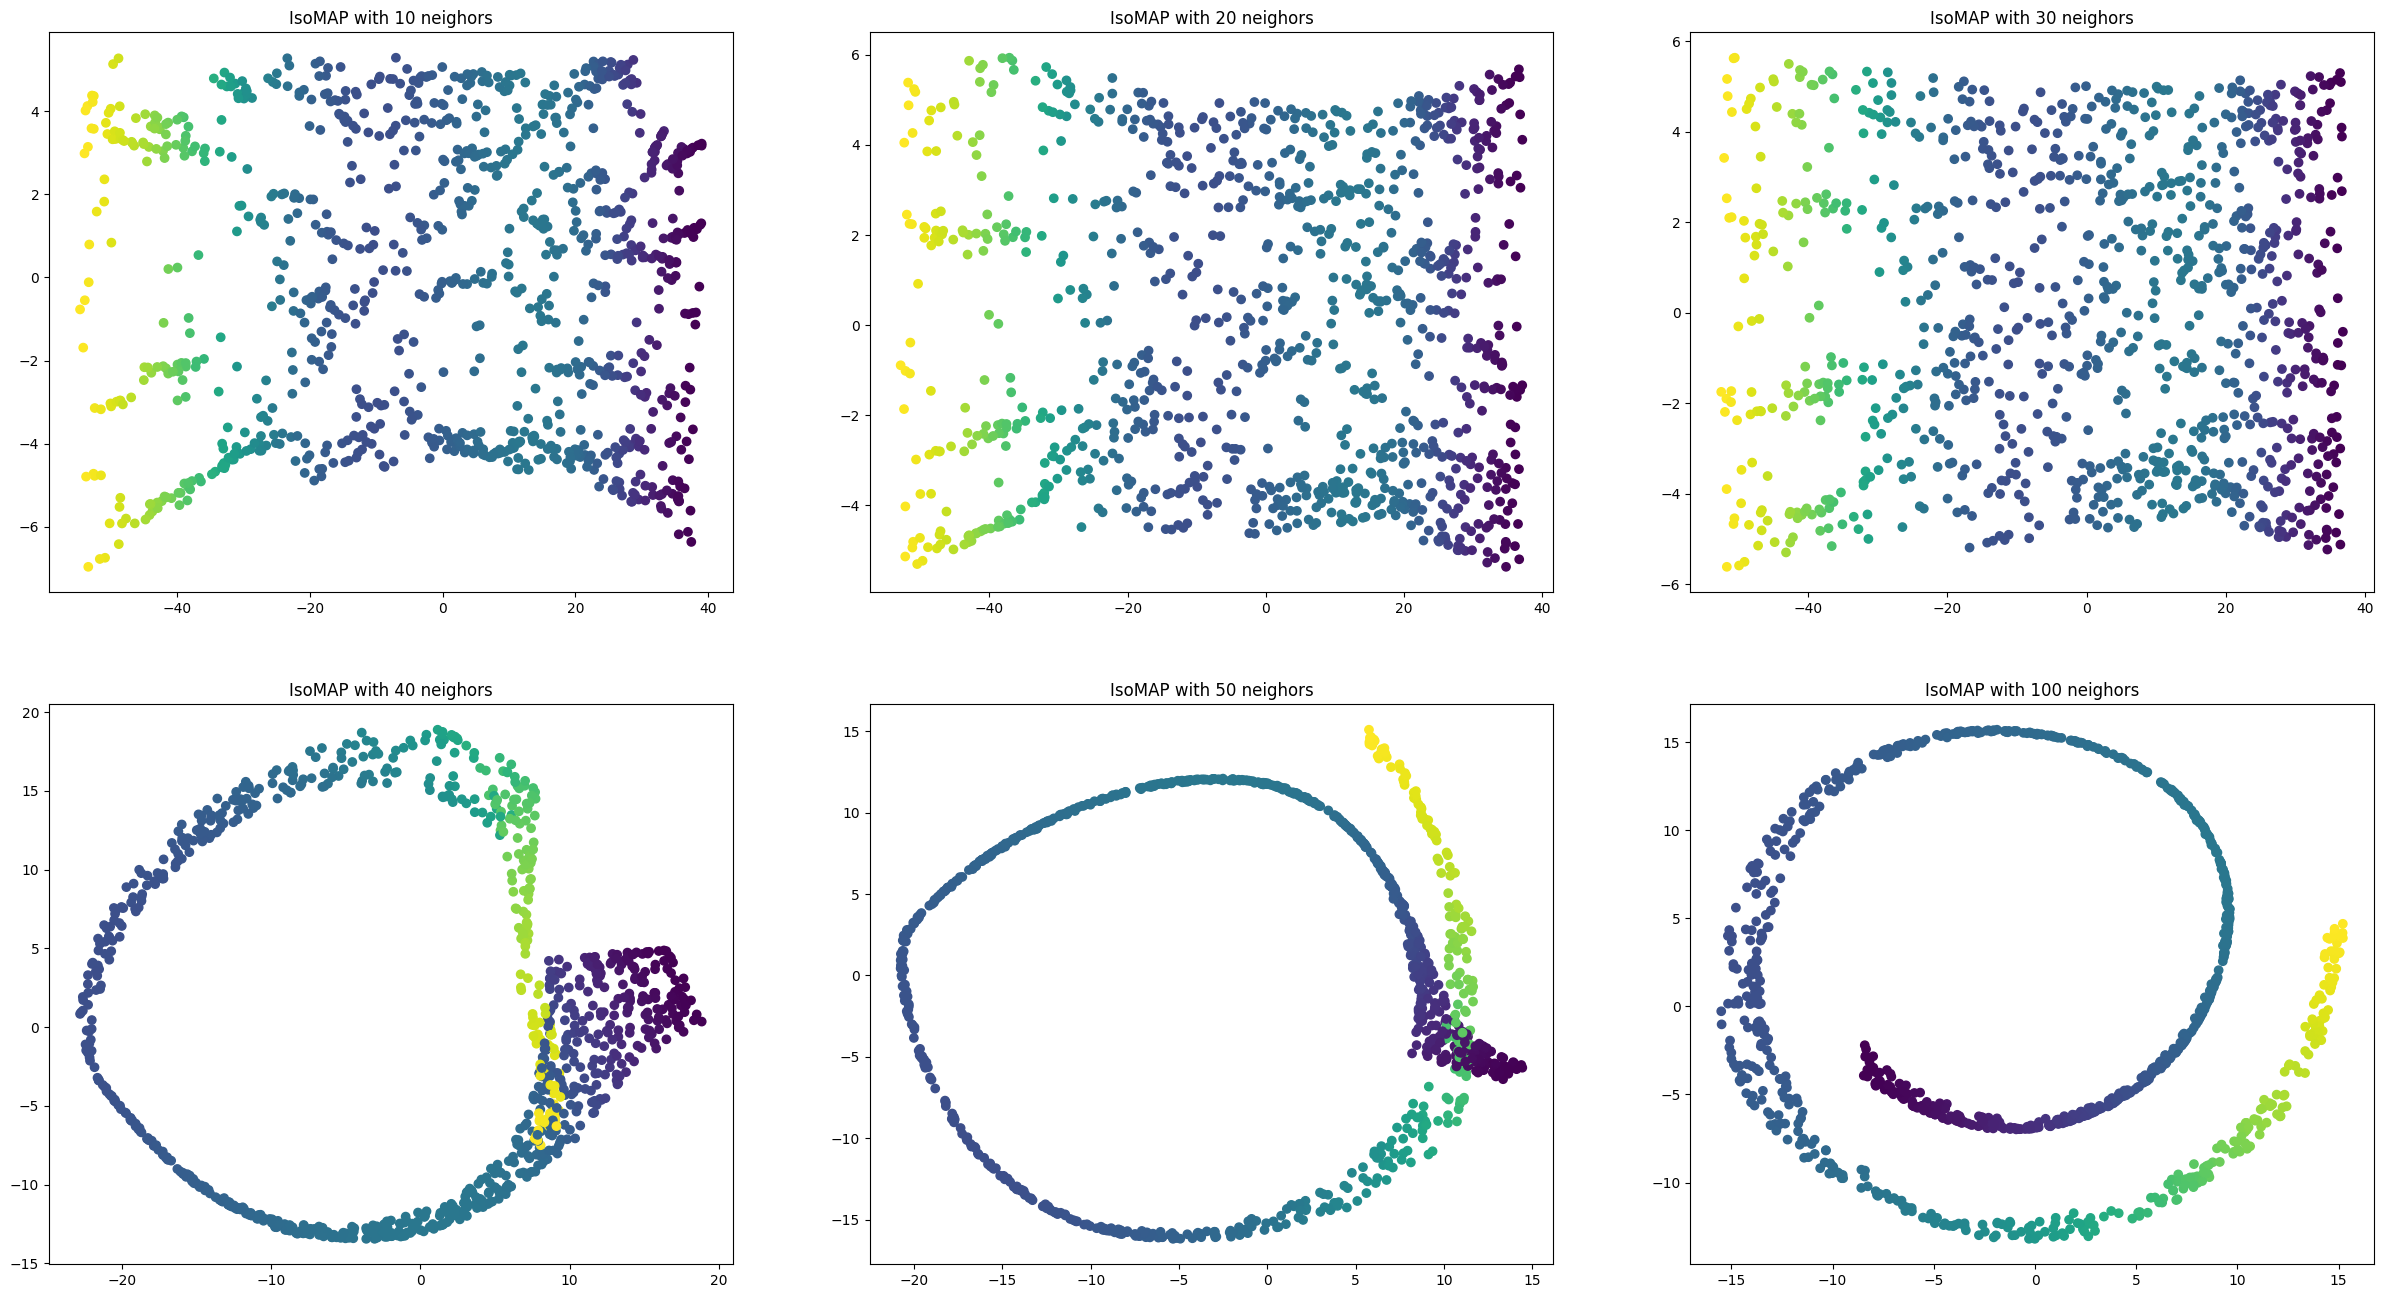

In [2]:
data = swiss_roll(1000)
clr = data[:, 0]**2+(data[:, 1]+2.5)**2

fig, ax = plt.subplots(2,3,figsize=(30,16))
for idx, n_neighbors in enumerate([10, 20, 30, 40 ,50 ,100]):
    isomap = Isomap('dijkstra', n_neighbors=n_neighbors)
    x = isomap.fit_transform(data)
    ax[int(idx/3),idx%3].scatter(x[:,0],x[:,1], c=clr)
    ax[int(idx/3),idx%3].set_title(f"IsoMAP with {n_neighbors} neighors")

In [3]:
def swiss_roll_noisy(n):
    """
    Parameters:
    n: int
        Number of points to generate"""
    
    data = np.zeros((n,3))
    phi = np.random.uniform(low=1.5*np.pi, high=4.5*np.pi, size=n)
    psi = np.random.uniform(0,10,n)
            
    data[:,0]=phi*np.cos(phi) + np.random.normal(0,0.5,n) #x coordinte
    data[:,1]=phi*np.sin(phi) + np.random.normal(0,0.5,n) #y coordinate
    data[:,2]=psi #z coordinate

    color = data[:,0]**2 + data[:,1]**2
    return data, color

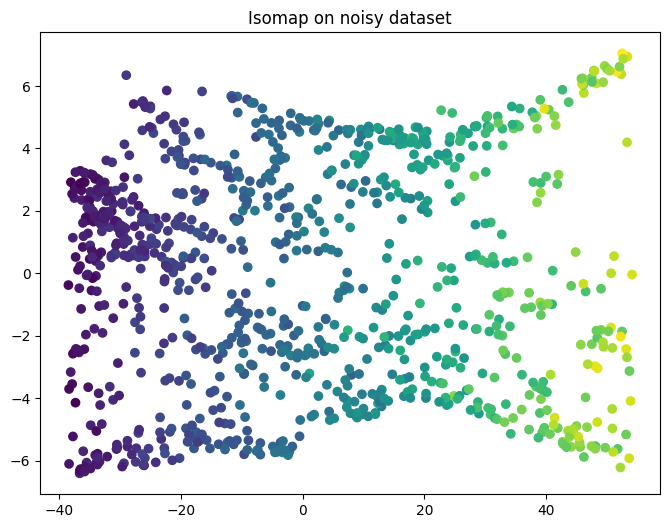

In [4]:
isomap = Isomap('dijkstra', 15, 2)
noisy_data,y = swiss_roll_noisy(1000)
iso_me = isomap.fit_transform(noisy_data)
plt.figure(figsize=(8,6))
plt.scatter(iso_me[:,0],iso_me[:,1], c=y)
plt.title("Isomap on noisy dataset")
plt.show()

## 2. Exercise 2
Undersample randomly from the Dry Bean Dataset in order to have n = 1000
datapoints. Follow the same pipeline of Exercise 1 of the previous lab by replacing PCA with Isomap. Discuss the differences with particular focus on the accuracy of the logistic regression.
**Important note**: in this case, you don't need to do the train-test split. Apply ISOMAP to the whole dataset first, and then do the train-test split and follow the rest of the pipeline.

In [6]:
beans = pd.read_excel('Unsupervised_Learning_2024/Datasets/Dry_Bean_Dataset.xlsx')

1: 0.04
2: 0.05
3: 0.05
4: 0.05
5: 0.05
6: 0.05
7: 0.05
8: 0.05
9: 0.05
10: 0.05
11: 0.05
12: 0.05
13: 0.05
14: 0.05
15: 0.05
16: 0.05


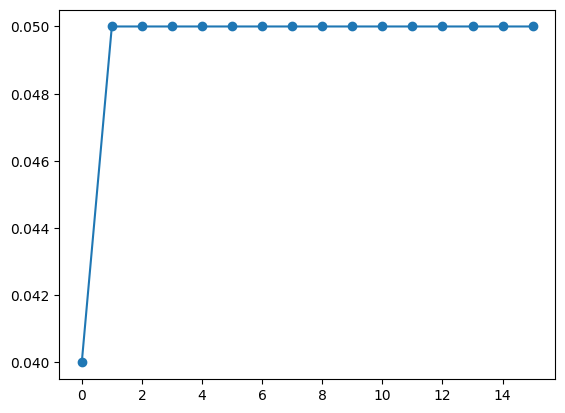

The maximum values of the accuaracy score is reached with 1 PCs and it is equal to 0.05


In [8]:
samples = beans.sample(1000)
y = np.array(samples['Class'])
encoder = OrdinalEncoder()
encoder.fit(y.reshape(-1, 1))
y = encoder.transform(y.reshape(-1, 1))
x = np.array(samples.drop('Class', axis=1))
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train = (x_train-x_train.mean())/x_train.std()
x_test=(x_test-x_test.mean())/x_test.std()
isomap = Isomap('dijkstra', n_neighbors=20, n_features=16)
x_iso = isomap.fit_transform(x_train)

score = []
for i in range(x_iso.shape[1]):
    model = LogisticRegression(max_iter=1000)
    model.fit(x_iso[:, :i+1], y_train.ravel())
    x_test_pca = isomap.fit_transform(x_test)
    x_test_pca = x_test_pca[:, :i+1]
    y_pred = model.predict(x_test_pca)
    print(f"{i+1}: {model.score(x_test_pca, y_test)}")
    score.append(model.score(x_test_pca, y_test))
plt.plot(score, "o-")
plt.show()
print(f"The maximum values of the accuaracy score is reached with {np.argmax(score)} PCs and it is equal to {np.max(score)}")

## Notes
- You can use the `sklearn.neighbors. NearestNeighbors` class.
- You are expected to write your own implementation of the **Floyd-Warshall algorithm**, as seen in class.
    - If you wish, you can implement Dijkstra's algorithm instead.
- Remember that your distance matrix must be **symmetric**!
- Suggestion: test you algorithm with n = 100 points at first.